Enter the end value of K starting from 1 to your input value = 32
[0.6304093567251463, 0.6137426900584795, 0.6742690058479532, 0.6745614035087719, 0.6412280701754386, 0.652046783625731, 0.6695906432748538, 0.6470760233918129, 0.6476608187134503, 0.6640350877192982, 0.6637426900584795, 0.6692982456140352, 0.6859649122807018, 0.6804093567251461, 0.6859649122807019, 0.6473684210526316, 0.6692982456140351, 0.6476608187134503, 0.6587719298245613, 0.630701754385965, 0.6526315789473685, 0.6418128654970761, 0.658187134502924, 0.6529239766081871, 0.6415204678362574, 0.6526315789473685, 0.6523391812865498, 0.658187134502924, 0.6307017543859649, 0.6418128654970761, 0.6584795321637427]


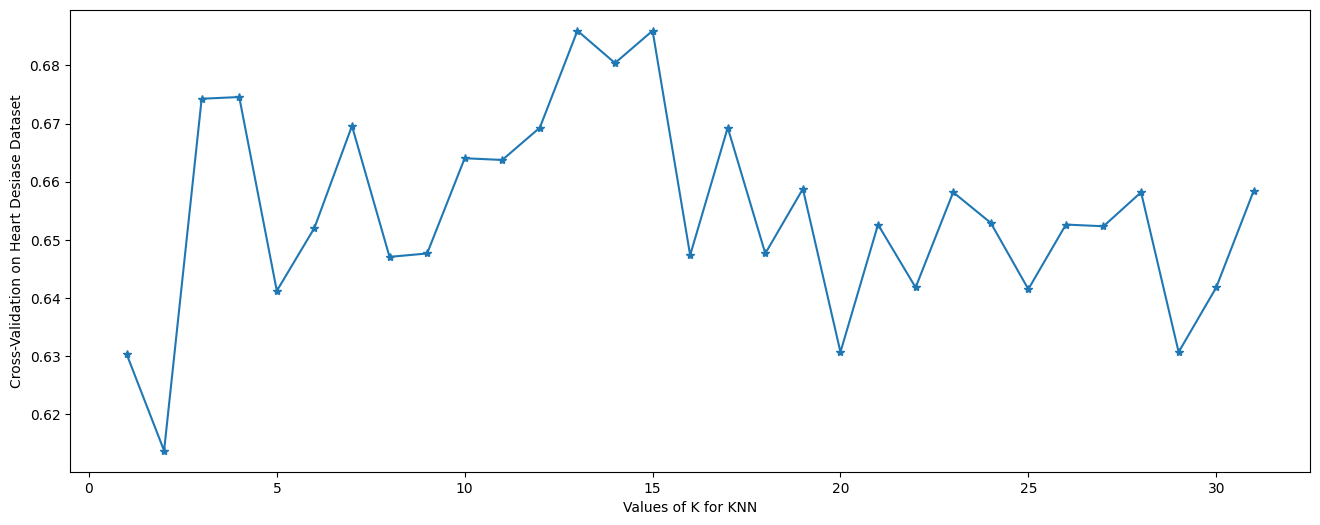

None 15
60.65573770491803
              precision    recall  f1-score   support

           0       0.47      0.61      0.53        44
           1       0.73      0.60      0.66        78

    accuracy                           0.61       122
   macro avg       0.60      0.61      0.60       122
weighted avg       0.64      0.61      0.61       122



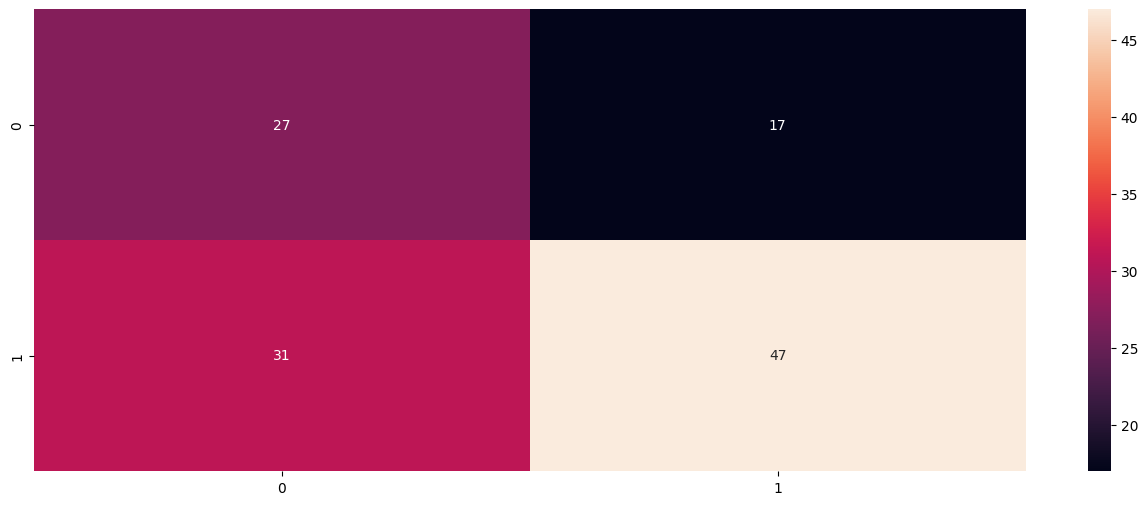

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score

#load dataset
data = pd.read_csv("heart2.csv")

x = data.iloc[:,:-1]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=1)

#create a list which store the avg score of cross-validation for each values of K

avg_knn_scroe =[]

# know taking value of take k starting from 1 to user values

user_input_k = int(input("Enter the end value of K starting from 1 to your input value = "))
knn_values_list = list(range(1,user_input_k))

for i in knn_values_list:
    knn = KNeighborsClassifier(n_neighbors=i)

    scroes_knn = cross_val_score(knn,x_train,y_train, cv=10, scoring='accuracy')
    avg_knn_scroe.append(scroes_knn.mean())
print(avg_knn_scroe)

plt.rcParams['figure.figsize']=(16,6)
plt.plot(knn_values_list, avg_knn_scroe,marker='*')
plt.xlabel('Values of K for KNN')
plt.ylabel('Cross-Validation on Heart Desiase Dataset')
best_k = knn_values_list[avg_knn_scroe.index(max(avg_knn_scroe))]
plt.show(),best_k
print(plt.show(),best_k)

knn.fit(x_train,y_train)
y_pred=knn.predict((x_test))

#confuse matrix
cn = confusion_matrix(y_pred,y_test)
sns.heatmap(cn, annot=True)

print(accuracy_score(y_pred, y_test)*100)
print(classification_report(y_pred,y_test))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')